In [1]:
%load_ext autoreload
%autoreload 2

from model import model, loss_function
import os
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [2]:
from dataLoader import DataLoader
top_k = 3000
data_path = '/data/Niklas/Flickr30k'
dataLoader = DataLoader(data_path)
dataLoader.convert_to_dataset(top_k)
if len(dataLoader.tokenizer.index_word) < top_k:
    top_k = len(dataLoader.tokenizer.index_word) - 1 # If our dictonary is less than top_k. -1 because <unk> is included
    dataLoader.top_k = top_k
max_length = dataLoader.max_length

In [3]:
print("Training size: {0}".format(len(dataLoader.cap_train)))
print("Validation size: {0}".format(len(dataLoader.cap_val)))
print("Max length: {0}".format(max_length))
print("Top k: {0}".format(top_k))

Training size: 116000
Validation size: 29000
Max length: 80
Top k: 3000


In [4]:
image_shape = (299,299,3)
embedding_matrix = None
embedding_dim = 512
lstm_units = embedding_dim

m = model(image_shape, embedding_dim, lstm_units, top_k, max_length)

In [87]:
m.load_weights('./Saved_models/best_model')

a crowd is clapping one guy
<start> Six children at a table with a green tablecloth, five female, one male, looking at the camera, plates and condiments at the table, two empty chairs, and red roses in the background <end>
<start> A group of children pose for a picture taken at the dining room table as they sit down for supper. <end>
<start> A group of 6 children varying in age from 7 to 14 are sitting around a dinner table ready to eat. <end>
<start> Six children sitting around a rectangular dining table with a green tablecloth and food on it. <end>
<start> A family photo of children eating a meal. <end>


[None, None, None, None, None]

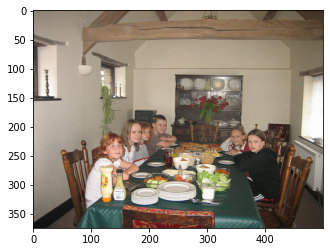

In [115]:
from create_dataset import read_img
import tensorflow as tf
import matplotlib.pyplot as plt

sample = dataLoader.img_name_val[0]
cap = dataLoader.org_data[sample]
img = read_img(sample)

img_1 = tf.io.read_file(sample)
img_1 = tf.image.decode_jpeg(img_1, channels=3)
plt.imshow(img_1)

result, o = m.predict(img[None,...], dataLoader.tokenizer)
print(' '.join(result))
[print(c) for c in cap]

In [84]:
len(o)

10

In [85]:
[o_i.shape for o_i in o]

[TensorShape([1, 2, 3001]),
 TensorShape([1, 3, 3001]),
 TensorShape([1, 4, 3001]),
 TensorShape([1, 5, 3001]),
 TensorShape([1, 6, 3001]),
 TensorShape([1, 7, 3001]),
 TensorShape([1, 8, 3001]),
 TensorShape([1, 9, 3001]),
 TensorShape([1, 10, 3001]),
 TensorShape([1, 11, 3001])]

In [86]:
for i in range(len(o)):
    j = []
    for o_i in o:
        if i < o_i.shape[1]:
            j.append(np.argmax(o_i[0,i,:]))
    print(j)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[37, 37, 37, 37, 37, 37, 37, 37, 37]
[11, 11, 11, 11, 11, 11, 11, 11]
[17, 17, 17, 17, 17, 17, 17]
[15, 15, 15, 15, 15, 15]
[41, 41, 41, 41, 41]
[38, 38, 38, 38]
[2, 2, 2]
[36, 36]


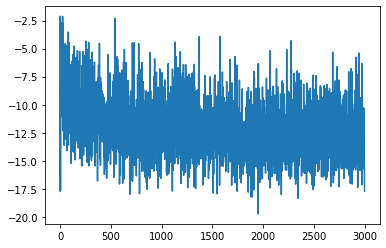

In [97]:
plt.plot(o[-1][0,5,:])

In [98]:
tf.random.categorical(o[-1][0,5,:], 1)

InvalidArgumentError: logits should be a matrix, got shape [3001] [Op:Multinomial]

In [102]:
tf.random.categorical(tf.math.log(o[-1][:,-1,:]), 1)[0][0].numpy()

1419

In [106]:
tf.random.categorical(o[-1][:,-1,:], 1)[0][0].numpy()

118

In [94]:
import numpy as np
np.argmax(o[-1][0,0,:])

2

of
of 11


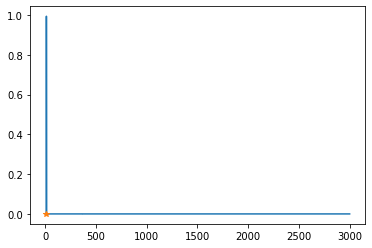

In [77]:
i = 3

dataLoader.tokenizer.index_word[np.argmax(o[0,i,:])]

predicted_id = tf.random.categorical(tf.math.log(o[:,i,:]), 1)[0][0].numpy()

print(dataLoader.tokenizer.index_word[np.argmax(o[0,i,:])])
print(dataLoader.tokenizer.index_word[predicted_id], predicted_id)

plt.plot(o[0,i,:])
plt.plot(predicted_id, 0, '*')

In [ ]:
sample = list(dataLoader.org_data.keys())[10]